<a href="https://colab.research.google.com/github/Lukatlina/-/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파일 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = '/content/drive/MyDrive/practice/titanic/train.csv'
test = '/content/drive/MyDrive/practice/titanic/test.csv'

* PassengerId : 탑승객의 고유 아이디
* Survival : 생존여부(0: 사망, 1: 생존)
* Pclass : 등실의 등급(1: 1등급, 2: 2등급, 3: 3등급)
* Name : 이름
* Sex : 성별
* Age : 나이
* Sibsp : 함께 탑승한 형제자매, 아내 남편의 수
* Parch: 함께 탑승한 부모, 자식의 수
* Ticket: 티켓번호
* Fare: 티켓의 요금
* Cabin: 객실번호
* Embarked: 배에 탑승한 위치(C = Cherbourg, Q = Queenstown, S = Southampton)

# 데이터 탐색

In [ ]:
train_df = pd.read_csv(train)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_df = pd.read_csv(test)
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train_df.shape  # 891개의 row와 12개의 column

(891, 12)

In [ ]:
test_df.shape  # 418개의 row와 11개의 column

(418, 11)

In [ ]:
train_df.ndim  # 2차원 데이터

2

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
# Cabin에 687개, Age에 177개, Embarked에 2개의 Null값이 있는 것을 확인할 수 있다.
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

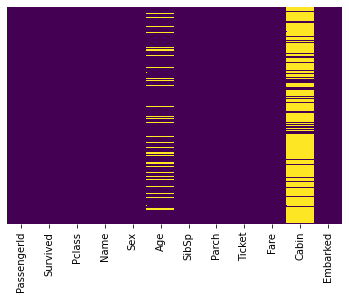

In [ ]:
# train 셋의 Null값 시각화
sns.heatmap(train_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [ ]:
# test셋에는 Age와 Cabin, Fare에 Null값이 존재하는 것으로 보인다.
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

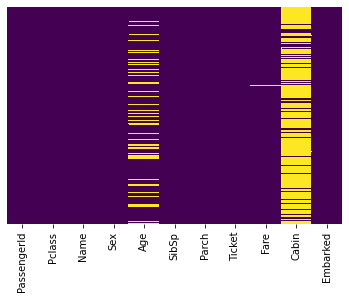

In [ ]:
sns.heatmap(test_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

* Age는 Null값처리가 필요할 것으로 보이며 Cabin은 객실번호로 Null값이 너무 많고 필요한 항목이 아닌것으로 보여 컬럼 삭제를 해도 좋을 것으로 보인다.
* Embarked는 항목이 제일 많은 것으로 처리 예정

In [ ]:
# Age와 Fare의 기술통계량
train_df[['Age', 'Fare']].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [ ]:
test_df[['Age', 'Fare']].describe()

,Age,Fare
count,332.000000,417.000000
mean,30.272590,35.627188
std,14.181209,55.907576
min,0.170000,0.000000
25%,21.000000,7.895800
50%,27.000000,14.454200
75%,39.000000,31.500000
max,76.000000,512.329200


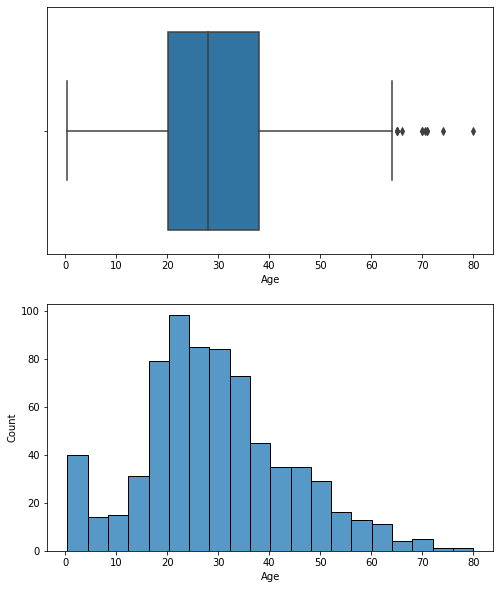

In [ ]:
# Age 시각화
fig, ax = plt.subplots(nrows=2, figsize=(8,10))

sns.boxplot(x='Age', data=train_df, ax=ax[0])
sns.histplot(x='Age', data=train_df, ax=ax[1])

plt.show()

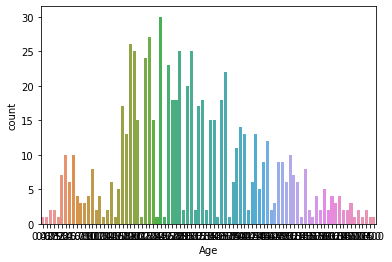

In [ ]:
# 구간화가 되지 않아서 보기 쉽지 않은 상태, NULL값 177개 존재 - 전처리 필요
sns.countplot(x='Age', data=train_df)
plt.show()

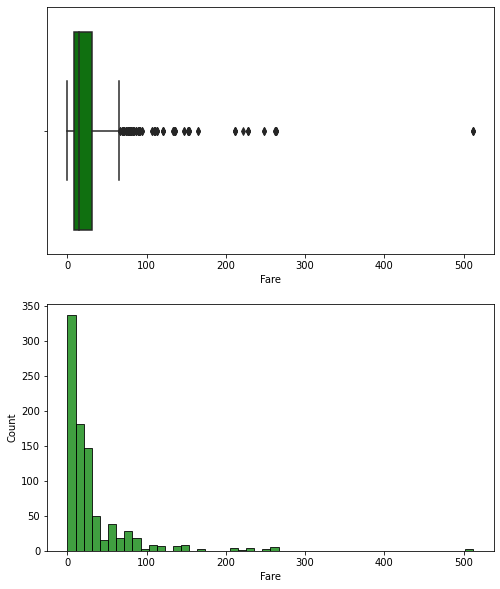

In [ ]:
# Fare 시각화 - 구간화 되지 않아서 전처리가 필요해 보임
fig, ax = plt.subplots(nrows=2, figsize=(8,10))

sns.boxplot(x='Fare', data=train_df, color='green', ax=ax[0])
sns.histplot(x='Fare', data=train_df, color='green', bins=50, ax=ax[1])

plt.show()

In [ ]:
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

* 탑승객 891명 중 생존자가 342명으로 약 38%의 승객이 살아남았다.

In [ ]:
train_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

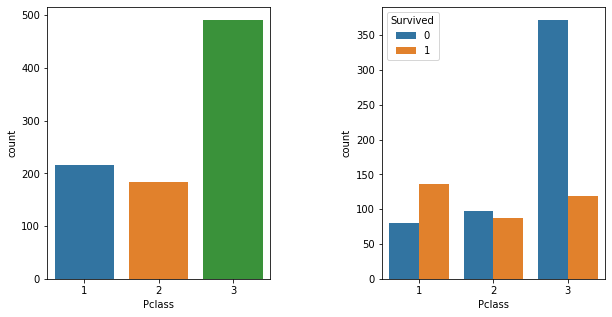

In [ ]:
# 등급별 전체 탑승객 수와 등급별 생존자와 사망자 수
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
sns.countplot(x='Pclass', data=train_df, ax=ax[0])
sns.countplot(x='Pclass',hue='Survived', data=train_df, ax=ax[1])
plt.subplots_adjust(wspace = 0.5)
plt.show()

* 3등석에 491명으로 탑승객이 제일 많았으며 2등석보다 1등석 탑승객이 32명이나 많았음을 알 수 있다.
* 생존률은 1등급이 제일 높았다는 것을 알 수 있다.

In [ ]:
# object 형식이라 전처리 필요
train_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
train_df[train_df['Survived']==1].head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C


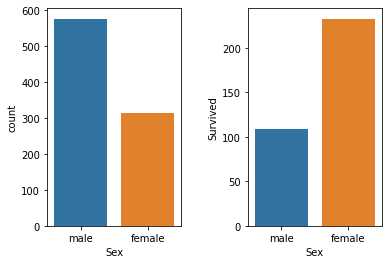

In [ ]:
fig, ax = plt.subplots(ncols=2)
sns.countplot(x='Sex', data=train_df, ax=ax[0])
sns.barplot(x='Sex', y='Survived', data=train_df, ci=None, estimator=np.sum, ax=ax[1])
plt.subplots_adjust(wspace = 0.5)
plt.show()

* 남성 577명, 여성 314명으로 여성의 비율은 35%정도이다.
* 생존자의 비율은 여성이 훨씬 높았다.

In [ ]:
train_df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

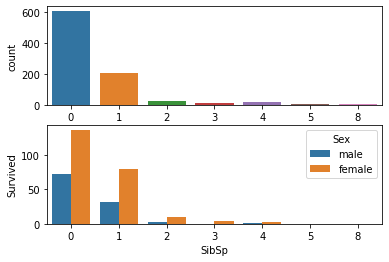

In [ ]:
fig, ax = plt.subplots(nrows=2)
sns.countplot(x='SibSp', data=train_df, ax=ax[0])
sns.barplot(x='SibSp', y='Survived',hue='Sex', data=train_df, ci=None, estimator=np.sum, ax=ax[1])
plt.show()

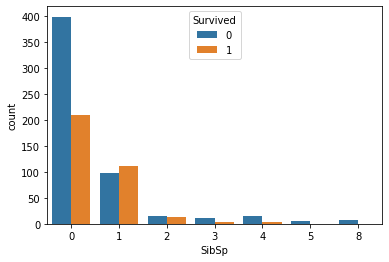

In [ ]:
sns.countplot(x='SibSp', hue='Survived', data=train_df)
plt.show()

* 탑승객과 함께 탄 형제자매나 배우자 수, 해당 사항이 없는 탑승객이 608명이며 1명과 동승한 경우는 209명이였다.

In [ ]:
train_df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

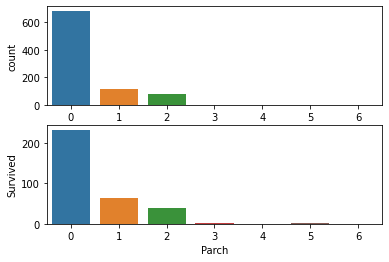

In [ ]:
fig, ax = plt.subplots(nrows=2)
sns.countplot(x='Parch',data=train_df, ax=ax[0])
sns.barplot(x='Parch', y='Survived', data=train_df, ci=None, estimator=np.sum, ax=ax[1])
plt.show()

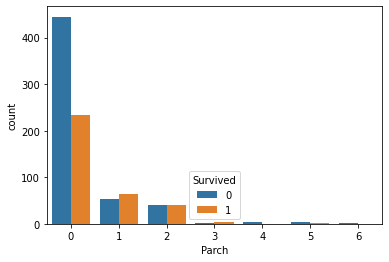

In [ ]:
sns.countplot(x='Parch', hue='Survived', data=train_df)
plt.show()

* 탑승객과 함께 탄 부모님 혹은 자식의 수, 678명은 해당이 되지 않았으며 118명은 1명과 같이 동승, 2명과 동승은 80명이였다.

In [ ]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

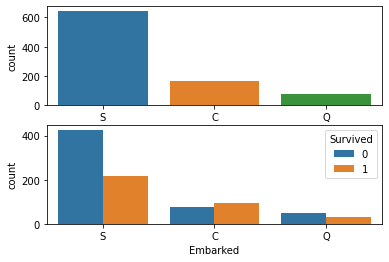

In [ ]:
fig, ax = plt.subplots(nrows=2)
sns.countplot(x='Embarked', data=train_df, ax=ax[0])
sns.countplot(x='Embarked', hue='Survived', data=train_df, ax=ax[1])
plt.show()

* 영국의 Southampton에서 644명, 프랑스의 Cherbourg에서 168명, 아일랜드 Queenstown에서 77명 탑승

In [ ]:
train_df['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [ ]:
train_df[train_df['Ticket'] == 'PC 17757' ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.525,NaN,C
557,558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.525,NaN,C
700,701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.525,C62 C64,C
716,717,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.525,C45,C


In [ ]:
train_df[train_df['Ticket']=='S.O.C. 14879']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
72,73,0,2,"Hood, Mr. Ambrose Jr",male,21.0,0,0,S.O.C. 14879,73.5,NaN,S
120,121,0,2,"Hickman, Mr. Stanley George",male,21.0,2,0,S.O.C. 14879,73.5,NaN,S
385,386,0,2,"Davies, Mr. Charles Henry",male,18.0,0,0,S.O.C. 14879,73.5,NaN,S
655,656,0,2,"Hickman, Mr. Leonard Mark",male,24.0,2,0,S.O.C. 14879,73.5,NaN,S
665,666,0,2,"Hickman, Mr. Lewis",male,32.0,2,0,S.O.C. 14879,73.5,NaN,S


In [ ]:
train_df[train_df['Ticket'] == 'CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


* Ticket 번호가 같은 사람들은 같이 티켓을 끊은 것으로 보인다. 그대로 쓰기보다는 파생 변수로 만들어 주도록 한다.
* 1등급이고 여성인 사람이 살아남을 확률이 높았다는 것을 여기서도 확인 할 수 있다.

# 데이터 전처리

In [ ]:
# 동일한 전처리를 위해서 데이터 셋 합치기
titanic_df = pd.concat([train_df, test_df], axis=0, ignore_index=True)
titanic_df.shape

(1309, 12)

In [ ]:
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


## Embaked

In [ ]:
# Null값 처리
titanic_df[titanic_df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [ ]:
# Series이기 때문에 (1,) 형태이며 저장해서 밑에 코드에 쓰고 싶다면 index로 꺼내주어야 사용가능
s = titanic_df['Embarked'].dropna().mode()[0]
print(s)
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(s)

S


* 최빈값도 S이다.

In [ ]:
# Fare - 지울 예정이지만 채워봄
titanic_df[titanic_df['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [ ]:
# 3등급 평균값으로 처리
f = titanic_df[titanic_df['Pclass']==3]['Fare'].mean()
print(f)
titanic_df['Fare'] = titanic_df['Fare'].fillna(f)

13.302888700564973


## Age

In [ ]:
# Age 처리
titanic_df['Title'] = titanic_df['Name'].str.extract('([A-Za-z]+)\.', expand = False)
titanic_df[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


* Age 처리에 앞서 나이에 따라서 호칭이 달라질 수 있다는 생각이 있었기 때문에 Name변수에서 호칭을 따로 빼서 호칭을 나누어주었다.
* 파생변수를 기준으로 평균 나이로 Null값을 채워주려고 한다.

In [ ]:
titanic_df['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64

* Don : 멕시코에서 나이가 많은 사람에게 쓰는 존대 (~씨정도)
* capt : 해군 대령, or 대위
* Major : 소령
* Col = Colonel: (영국의 해군과 해병대, 미국의 육군·공군·해병대의) 대령
* Rev : 신부님
* Dr : 박사
* Jonkheer : '도련님'정도로 쓰이는 프로이센 지배 계급을 형성한 보수적인 토지 귀족 세력
* Sir : 영국에서 나이트나 준남작의 작위를 가진 남성의 이름 앞에 붙이는 호칭
* Mmm : 프랑스 여성 - 24세
* Dona : 귀부인
* Mlle : 마드모아젤
* Coutess : 백작부인

In [ ]:
# 계급보다는 성별이 생존에 더 중요한 요소이기 때문에 여성귀족의 경우 일반 호칭으로 통합해준다.
# 남성의 경우 계급이나 직업으로 불린 경우 프라이드가 강해서인지 남을 위해 많이 희생한걸로 보인다. (ex: Rev:신부님)
# 이들은 Other로 묶어주도록 한다.
titanic_df['Title'] = titanic_df['Title'].replace('Don', 'Mr')
titanic_df['Title'] = titanic_df['Title'].replace(['Mlle', 'Ms', 'Lady', 'Mme'], 'Miss')
titanic_df['Title'] = titanic_df['Title'].replace(['Countess', 'Dona'], 'Mrs')
titanic_df['Title'] = titanic_df['Title'].replace(['Rev', 'Dr', 'Col', 'Major', 'Sir', 'Capt', 'Jonkheer'], 'Other')

In [ ]:
titanic_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [ ]:
# 각 호칭의 나이 평균값으로 Null값을 채워줌
titanic_df.groupby('Title')['Age'].mean()

Title
Master     5.482642
Miss      21.956233
Mr        32.265464
Mrs       36.982558
Other     46.041667
Name: Age, dtype: float64

In [ ]:
# 호칭에 따라서 Age Null값 처리
titanic_df.loc[(titanic_df.Age.isnull()) & (titanic_df.Title == 'Mr'),'Age'] = 32
titanic_df.loc[(titanic_df.Age.isnull()) & (titanic_df.Title == 'Mrs'),'Age'] = 37
titanic_df.loc[(titanic_df.Age.isnull()) & (titanic_df.Title == 'Miss'),'Age'] = 22
titanic_df.loc[(titanic_df.Age.isnull()) & (titanic_df.Title == 'Master'),'Age'] = 5
titanic_df.loc[(titanic_df.Age.isnull()) & (titanic_df.Title == 'Other'),'Age'] = 46

In [ ]:
# null값이 있는지 확인
titanic_df['Age'].isnull().any()

False

In [ ]:
titanic_df.Age.describe()

count    1309.000000
mean       29.866058
std        13.192174
min         0.170000
25%        22.000000
50%        30.000000
75%        36.000000
max        80.000000
Name: Age, dtype: float64

In [ ]:
# Age 구간화
# Master의 최대 나이가 12세인것을 보아 아이를 어린아이로 보는 기준이 12세라고 생각했으며,
# 1912년 당시 현재보다 수명이 짧아 60세면 노인으로 보았기 때문에 60세를 중요하게 보았다.
titanic_df.loc[titanic_df['Age']<=5, 'Age'] = 0
titanic_df.loc[(titanic_df['Age']>5) & (titanic_df['Age']<=12), 'Age'] = 1
titanic_df.loc[(titanic_df['Age']>12) & (titanic_df['Age']<=18), 'Age'] = 2
titanic_df.loc[(titanic_df['Age']>18) & (titanic_df['Age']<=25), 'Age'] = 3
titanic_df.loc[(titanic_df['Age']>25) & (titanic_df['Age']<=35), 'Age'] = 4
titanic_df.loc[(titanic_df['Age']>35) & (titanic_df['Age']<=60), 'Age'] = 5
titanic_df.loc[titanic_df['Age']>60, 'Age'] = 6

titanic_df['Age'].astype(int)

0       3
1       5
2       4
3       4
4       4
       ..
1304    4
1305    5
1306    5
1307    4
1308    0
Name: Age, Length: 1309, dtype: int64

In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,3.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,4.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,4.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,4.0,0,0,373450,8.0500,NaN,S,Mr


In [ ]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,3.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,4.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,4.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,4.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,4.0,0,0,A.5. 3236,8.0500,NaN,S,Mr
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,5.0,0,0,PC 17758,108.9000,C105,C,Mrs
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,5.0,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",male,4.0,0,0,359309,8.0500,NaN,S,Mr


## Cabin

In [ ]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
titanic_df[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,3.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,71.2833,C,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,4.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,4.0,1,0,113803,53.1000,C,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,4.0,0,0,373450,8.0500,NaN,S,Mr


In [ ]:
# 1, 2, 3등급별로 확실하게 Cabin 구역이 나눠져 있지 않아서 중위값으로 채우면 오히려 나쁜 영향을 줄 수 있다.
# Null값은 0으로 처리하도록 한다.
titanic_df.groupby('Pclass').Cabin.value_counts()

Pclass  Cabin
1       C        94
        B        65
        D        40
        E        34
        A        22
        T         1
2       F        13
        D         6
        E         4
3       F         8
        G         5
        E         3
Name: Cabin, dtype: int64

## Title

In [ ]:
title_mapping = {'Mr':1, 'Mrs':2, 'Miss':3, 'Master':4, 'Other':5}
titanic_df['Title'] = titanic_df['Title'].map(title_mapping)
titanic_df['Title'].value_counts()

1    758
3    266
2    199
4     61
5     25
Name: Title, dtype: int64

## Sex

In [ ]:
# 라벨 인코딩 한번 사용해봄
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(titanic_df['Sex'])
titanic_df['Sex'] = le.transform(titanic_df['Sex'])
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",1,3.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,5.0,1,0,PC 17599,71.2833,C,C,2
2,3,1.0,3,"Heikkinen, Miss. Laina",0,4.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4.0,1,0,113803,53.1000,C,S,2
4,5,0.0,3,"Allen, Mr. William Henry",1,4.0,0,0,373450,8.0500,NaN,S,1


## 파생변수

### ticket_size

In [ ]:
idx = titanic_df.Ticket.value_counts().index
idx[:5]

Index(['CA. 2343', 'CA 2144', '1601', 'PC 17608', 'S.O.C. 14879'], dtype='object')

In [ ]:
idx_size = []
for i in idx:
    s = titanic_df[titanic_df['Ticket'] == i].count()[8]
    idx_size.append(s)

idx_size[:5]

together=[]
for pairs in zip(idx, idx_size):
    together.append(pairs)

together[:5]

[('CA. 2343', 11),
 ('CA 2144', 8),
 ('1601', 8),
 ('PC 17608', 7),
 ('S.O.C. 14879', 7)]

* value_counts()한 것을 데이터 프레임으로 만들어서 그냥 merge하면 되는데 for in 구문으로 Series를 만드는 바보짓을 했다...

In [ ]:
together = pd.DataFrame(together)
together

,0,1
0,CA. 2343,11
1,CA 2144,8
2,1601,8
3,PC 17608,7
4,S.O.C. 14879,7
...,...,...
924,113792,1
925,36209,1
926,323592,1
927,315089,1


In [ ]:
titanic_df = pd.merge(titanic_df, together, left_on='Ticket', right_on=0)

In [ ]:
titanic_df = titanic_df.drop(columns=0)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,1
0,1,0.0,3,"Braund, Mr. Owen Harris",1,3.0,1,0,A/5 21171,7.2500,NaN,S,1,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,5.0,1,0,PC 17599,71.2833,C,C,2,2
2,1126,NaN,1,"Cumings, Mr. John Bradley",1,5.0,1,0,PC 17599,71.2833,C,C,1,2
3,3,1.0,3,"Heikkinen, Miss. Laina",0,4.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3,1
4,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4.0,1,0,113803,53.1000,C,S,2,2


In [ ]:
# 티켓 함께 구매한 사람 수
titanic_df = titanic_df.rename(columns={1:'Ticketsize'})
titanic_df[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Ticketsize
0,1,0.0,3,"Braund, Mr. Owen Harris",1,3.0,1,0,A/5 21171,7.2500,NaN,S,1,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,5.0,1,0,PC 17599,71.2833,C,C,2,2
2,1126,NaN,1,"Cumings, Mr. John Bradley",1,5.0,1,0,PC 17599,71.2833,C,C,1,2
3,3,1.0,3,"Heikkinen, Miss. Laina",0,4.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3,1
4,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4.0,1,0,113803,53.1000,C,S,2,2


In [ ]:
titanic_df.groupby('Ticketsize')['Survived'].mean()

Ticketsize
1     0.270270
2     0.513812
3     0.653465
4     0.727273
5     0.333333
6     0.210526
7     0.208333
8     0.384615
11    0.000000
Name: Survived, dtype: float64

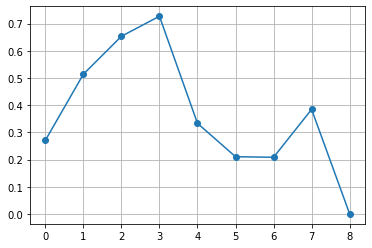

In [ ]:
plt.plot(titanic_df.groupby('Ticketsize')['Survived'].mean().values,marker='o')
plt.grid()
plt.show()

In [ ]:
ticket_mapping = {1:0, 2:0.4, 3:0.8, 4:1.2, 5:1.6, 6:2, 7:2.4, 8:2.8, 9:3.2, 10:3.6, 11:4}
titanic_df['Ticketsize'] = titanic_df['Ticketsize'].map(ticket_mapping)
titanic_df[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Ticketsize
0,1,0.0,3,"Braund, Mr. Owen Harris",1,3.0,1,0,A/5 21171,7.2500,NaN,S,1,0.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,5.0,1,0,PC 17599,71.2833,C,C,2,0.4
2,1126,NaN,1,"Cumings, Mr. John Bradley",1,5.0,1,0,PC 17599,71.2833,C,C,1,0.4
3,3,1.0,3,"Heikkinen, Miss. Laina",0,4.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3,0.0
4,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4.0,1,0,113803,53.1000,C,S,2,0.4


### Familysize

In [ ]:
titanic_df['Familysize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Ticketsize,Familysize
0,1,0.0,3,"Braund, Mr. Owen Harris",1,3.0,1,0,A/5 21171,7.2500,NaN,S,1,0.0,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,5.0,1,0,PC 17599,71.2833,C,C,2,0.4,2
2,1126,NaN,1,"Cumings, Mr. John Bradley",1,5.0,1,0,PC 17599,71.2833,C,C,1,0.4,2
3,3,1.0,3,"Heikkinen, Miss. Laina",0,4.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3,0.0,1
4,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4.0,1,0,113803,53.1000,C,S,2,0.4,2


In [ ]:
titanic_df = titanic_df.sort_values('PassengerId')

In [ ]:
titanic_df.groupby('Familysize')['Survived'].mean()

Familysize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

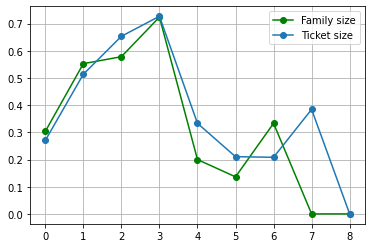

In [ ]:
plt.plot(titanic_df.groupby('Familysize')['Survived'].mean().values, marker='o', color='green', label='Family size')
plt.plot(titanic_df.groupby('Ticketsize')['Survived'].mean().values,marker='o', label='Ticket size')
plt.legend()
plt.grid()
plt.show()

In [ ]:
family_mapping = {1:0, 2:0.4, 3:0.8, 4:1.2, 5:1.6, 6:2, 7:2.4, 8:2.8, 9:3.2, 10:3.6, 11:4}
titanic_df['Familysize'] = titanic_df['Familysize'].map(family_mapping)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Ticketsize,Familysize
0,1,0.0,3,"Braund, Mr. Owen Harris",1,3.0,1,0,A/5 21171,7.2500,NaN,S,1,0.0,0.4
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,5.0,1,0,PC 17599,71.2833,C,C,2,0.4,0.4
3,3,1.0,3,"Heikkinen, Miss. Laina",0,4.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3,0.0,0.0
4,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4.0,1,0,113803,53.1000,C,S,2,0.4,0.4
6,5,0.0,3,"Allen, Mr. William Henry",1,4.0,0,0,373450,8.0500,NaN,S,1,0.0,0.0


In [ ]:
titanic_df['Pclass_1']=(titanic_df['Pclass']==1)
titanic_df['Pclass_2']=(titanic_df['Pclass']==2)
titanic_df['Pclass_3']=(titanic_df['Pclass']==3)

In [ ]:
titanic_df[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Ticketsize,Familysize,Pclass_1,Pclass_2,Pclass_3
0,1,0.0,3,"Braund, Mr. Owen Harris",1,3.0,1,0,A/5 21171,7.2500,NaN,S,1,0.0,0.4,False,False,True
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,5.0,1,0,PC 17599,71.2833,C,C,2,0.4,0.4,True,False,False
3,3,1.0,3,"Heikkinen, Miss. Laina",0,4.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3,0.0,0.0,False,False,True
4,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4.0,1,0,113803,53.1000,C,S,2,0.4,0.4,True,False,False
6,5,0.0,3,"Allen, Mr. William Henry",1,4.0,0,0,373450,8.0500,NaN,S,1,0.0,0.0,False,False,True


In [ ]:
# 좋아보여서 써봄
embrked_dummies = pd.get_dummies(titanic_df['Embarked'], prefix='embarked')
embrked_dummies

,embarked_C,embarked_Q,embarked_S
0,0,0,1
1,1,0,0
3,0,0,1
4,0,0,1
6,0,0,1
...,...,...,...
1306,0,0,1
496,1,0,0
1307,0,0,1
1308,0,0,1


In [ ]:
titanic_df = pd.concat([titanic_df, embrked_dummies], axis=1)
titanic_df[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Title,Ticketsize,Familysize,Pclass_1,Pclass_2,Pclass_3,embarked_C,embarked_Q,embarked_S
0,1,0.0,3,"Braund, Mr. Owen Harris",1,3.0,1,0,A/5 21171,7.2500,...,S,1,0.0,0.4,False,False,True,0,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,5.0,1,0,PC 17599,71.2833,...,C,2,0.4,0.4,True,False,False,1,0,0
3,3,1.0,3,"Heikkinen, Miss. Laina",0,4.0,0,0,STON/O2. 3101282,7.9250,...,S,3,0.0,0.0,False,False,True,0,0,1
4,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4.0,1,0,113803,53.1000,...,S,2,0.4,0.4,True,False,False,0,0,1
6,5,0.0,3,"Allen, Mr. William Henry",1,4.0,0,0,373450,8.0500,...,S,1,0.0,0.0,False,False,True,0,0,1


In [ ]:
cabin_dummies = pd.get_dummies(titanic_df['Cabin'], prefix='Cabin')
cabin_dummies
titanic_df = pd.concat([titanic_df, cabin_dummies], axis=1)
titanic_df[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,embarked_Q,embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
0,1,0.0,3,"Braund, Mr. Owen Harris",1,3.0,1,0,A/5 21171,7.2500,...,0,1,0,0,0,0,0,0,0,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,5.0,1,0,PC 17599,71.2833,...,0,0,0,0,1,0,0,0,0,0
3,3,1.0,3,"Heikkinen, Miss. Laina",0,4.0,0,0,STON/O2. 3101282,7.9250,...,0,1,0,0,0,0,0,0,0,0
4,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4.0,1,0,113803,53.1000,...,0,1,0,0,1,0,0,0,0,0
6,5,0.0,3,"Allen, Mr. William Henry",1,4.0,0,0,373450,8.0500,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
title_dummies = pd.get_dummies(titanic_df['Title'], prefix='Title')
title_dummies
titanic_df = pd.concat([titanic_df, title_dummies], axis=1)
titanic_df[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Title_1,Title_2,Title_3,Title_4,Title_5
0,1,0.0,3,"Braund, Mr. Owen Harris",1,3.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,1,0,0,0,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,5.0,1,0,PC 17599,71.2833,...,0,0,0,0,0,0,1,0,0,0
3,3,1.0,3,"Heikkinen, Miss. Laina",0,4.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,0,1,0,0
4,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4.0,1,0,113803,53.1000,...,0,0,0,0,0,0,1,0,0,0
6,5,0.0,3,"Allen, Mr. William Henry",1,4.0,0,0,373450,8.0500,...,0,0,0,0,0,1,0,0,0,0


## 컬럼 삭제

In [ ]:
features_drop = ['Pclass', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title']
titanic_df = titanic_df.drop(features_drop, axis=1)

In [ ]:
titanic_df[:5]

,PassengerId,Survived,Sex,Age,Ticketsize,Familysize,Pclass_1,Pclass_2,Pclass_3,embarked_C,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Title_1,Title_2,Title_3,Title_4,Title_5
0,1,0.0,1,3.0,0.0,0.4,False,False,True,0,...,0,0,0,0,0,1,0,0,0,0
1,2,1.0,0,5.0,0.4,0.4,True,False,False,1,...,0,0,0,0,0,0,1,0,0,0
3,3,1.0,0,4.0,0.0,0.0,False,False,True,0,...,0,0,0,0,0,0,0,1,0,0
4,4,1.0,0,4.0,0.4,0.4,True,False,False,0,...,0,0,0,0,0,0,1,0,0,0
6,5,0.0,1,4.0,0.0,0.0,False,False,True,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
titanic_df = titanic_df.sort_values('PassengerId', ignore_index=True)
titanic_df.head()

,PassengerId,Survived,Sex,Age,Ticketsize,Familysize,Pclass_1,Pclass_2,Pclass_3,embarked_C,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Title_1,Title_2,Title_3,Title_4,Title_5
0,1,0.0,1,3.0,0.0,0.4,False,False,True,0,...,0,0,0,0,0,1,0,0,0,0
1,2,1.0,0,5.0,0.4,0.4,True,False,False,1,...,0,0,0,0,0,0,1,0,0,0
2,3,1.0,0,4.0,0.0,0.0,False,False,True,0,...,0,0,0,0,0,0,0,1,0,0
3,4,1.0,0,4.0,0.4,0.4,True,False,False,0,...,0,0,0,0,0,0,1,0,0,0
4,5,0.0,1,4.0,0.0,0.0,False,False,True,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
X = titanic_df.drop(columns='Survived')
X[:5]

,PassengerId,Sex,Age,Ticketsize,Familysize,Pclass_1,Pclass_2,Pclass_3,embarked_C,embarked_Q,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Title_1,Title_2,Title_3,Title_4,Title_5
0,1,1,3.0,0.0,0.4,False,False,True,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2,0,5.0,0.4,0.4,True,False,False,1,0,...,0,0,0,0,0,0,1,0,0,0
2,3,0,4.0,0.0,0.0,False,False,True,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,0,4.0,0.4,0.4,True,False,False,0,0,...,0,0,0,0,0,0,1,0,0,0
4,5,1,4.0,0.0,0.0,False,False,True,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
y = titanic_df['Survived']
y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(X, y,
                                          random_state=7,
                                          shuffle=False,
                                          train_size=891)

In [ ]:
idx = X_te['PassengerId']
idx[:5]

891    892
892    893
893    894
894    895
895    896
Name: PassengerId, dtype: int64

In [ ]:
X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((891, 24), (418, 24), (891,), (418,))

In [ ]:
# 제대로 잘 나눠졌는지 확인
y_te.isnull().sum()

418

In [ ]:
X_tr = X_tr.drop(columns='PassengerId')
X_te = X_te.drop(columns='PassengerId')
y_tr = y_tr.drop(columns='PassengerId')

In [ ]:
feature_names = titanic_df.columns[2:]
feature_names

Index(['Sex', 'Age', 'Ticketsize', 'Familysize', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'embarked_C', 'embarked_Q', 'embarked_S', 'Cabin_A',
       'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G',
       'Cabin_T', 'Title_1', 'Title_2', 'Title_3', 'Title_4', 'Title_5'],
      dtype='object')

In [ ]:
tn = ['Victim',' Surviver']
print(tn)

['Victim', ' Surviver']


# 모델링

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import VotingClassifier

In [ ]:
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gnb = GaussianNB()
sgd = SGDClassifier(loss='log')
svc = SVC(probability=True)
lr = LogisticRegression()
xgbc = XGBClassifier()

models = [knn, dt, rf, gnb, sgd, svc, lr, xgbc]
model_names = []
train_score = []
validation_score = []
for m in models:
    cv = cross_validate(estimator=m, X=X_tr, y=y_tr, n_jobs=-1, return_train_score=True)
    train_score.append(np.mean(cv['train_score']))
    validation_score.append(np.mean(cv['test_score']))
    model_names.append(m.__class__.__name__)

print(model_names)
print(train_score)
print(validation_score)

['KNeighborsClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier', 'GaussianNB', 'SGDClassifier', 'SVC', 'LogisticRegression', 'XGBClassifier']
[0.8563393321461777, 0.9135820319271317, 0.9135820319271317, 0.7488799502024992, 0.7954437650692594, 0.834173928802181, 0.8423121168665396, 0.8641993791071119]
[0.8058753373925052, 0.7935660033896177, 0.8081036971941498, 0.7418994413407821, 0.7789655388864478, 0.828253091456908, 0.830525390747599, 0.8327788588286987]


In [ ]:
models_df = pd.DataFrame({'Model Name' : model_names,
                          'Train Accuracy' : train_score,
                          'Validation Accuracy': validation_score})
models_df.sort_values(by='Validation Accuracy', ascending=False)

,Model Name,Train Accuracy,Validation Accuracy
7,XGBClassifier,0.864199,0.832779
6,LogisticRegression,0.842312,0.830525
5,SVC,0.834174,0.828253
2,RandomForestClassifier,0.913582,0.808104
0,KNeighborsClassifier,0.856339,0.805875
1,DecisionTreeClassifier,0.913582,0.793566
4,SGDClassifier,0.795444,0.778966
3,GaussianNB,0.748880,0.741899


* DecisionTree와 Random Forest의 훈련 셋 결과가 좋고 XGB와 LogisticRegression, SVC가 Validation 셋에서 좋은 결과를 보여주고 있기 때문에 이 다섯개의 모델로 GridsearchCV를 해보려고 한다. 

## Decision Tree

In [ ]:
params = {'splitter': ['best','random'],
          'max_depth':np.arange(2, 15),
          'min_samples_split':np.arange(2, 20, 2),
          'max_features': ['auto', 'sqrt', 'log2']}
dt = DecisionTreeClassifier()
grid_dt = GridSearchCV(estimator=dt, param_grid=params, n_jobs=-1)

In [ ]:
grid_dt.fit(X_tr, y_tr)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                         'splitter': ['best', 'random']})

In [ ]:
grid_dt.best_params_

{'max_depth': 8,
 'max_features': 'auto',
 'min_samples_split': 12,
 'splitter': 'best'}

In [ ]:
grid_dt.best_score_

0.8282781997363632

In [ ]:
best_grid_dt = grid_dt.best_estimator_
best_grid_dt

DecisionTreeClassifier(max_depth=8, max_features='auto', min_samples_split=12)

In [ ]:
te_pred_dt = best_grid_dt.predict(X_te)
te_pred_dt[:5]

array([0., 0., 0., 0., 1.])

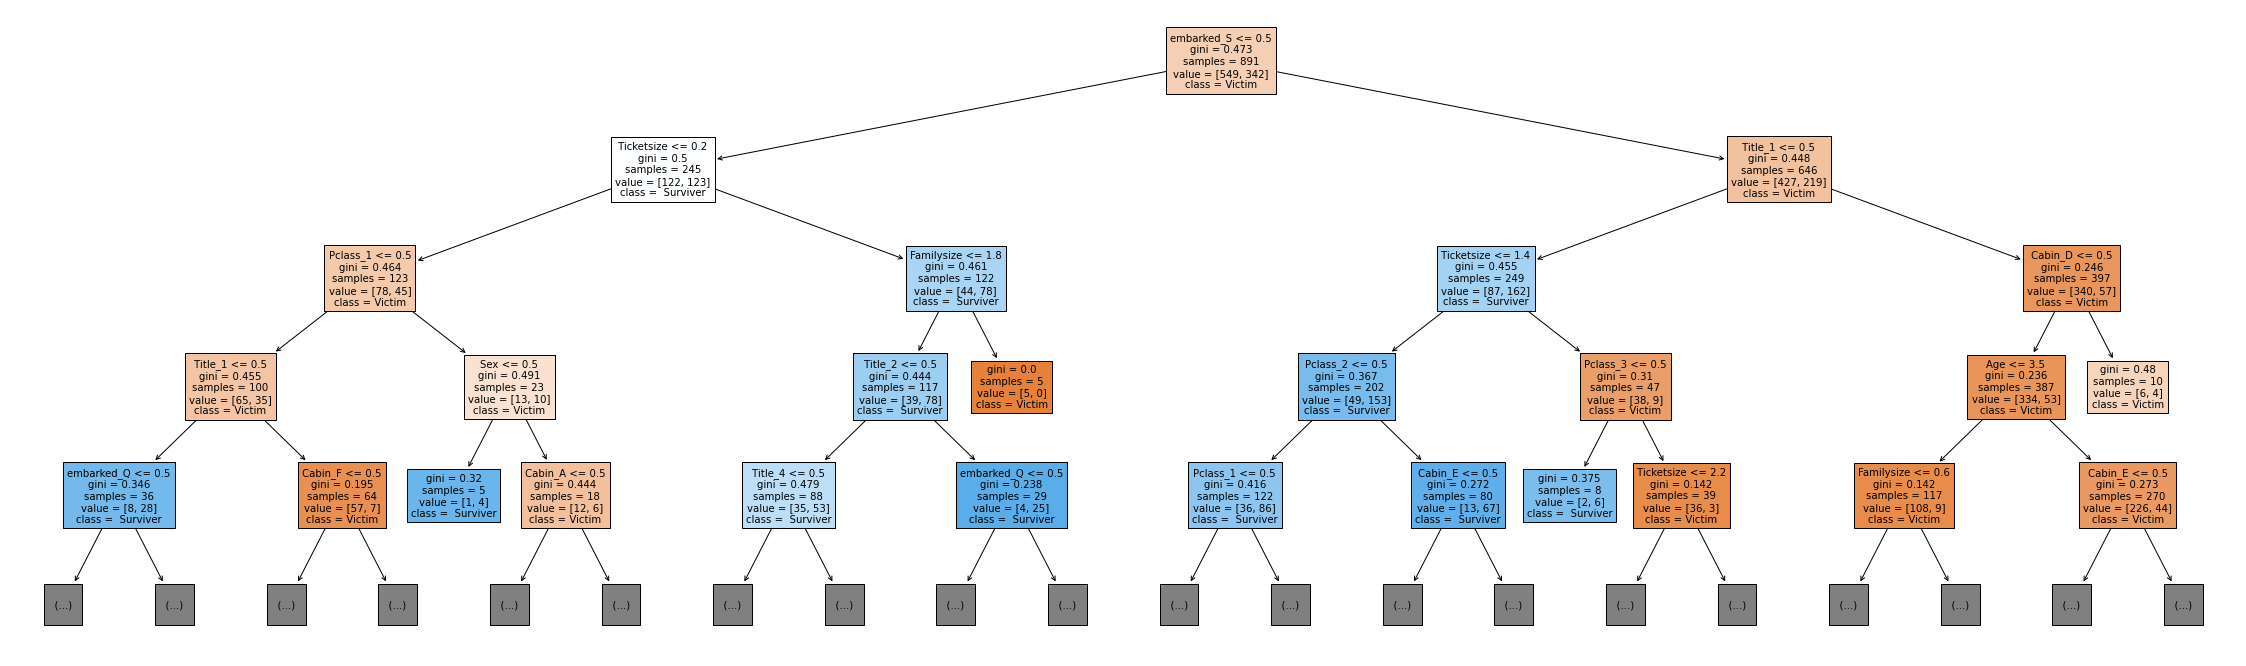

In [ ]:
plt.figure(figsize=(40,12))
plot_tree(best_grid_dt, max_depth=4, filled=True, feature_names=feature_names, class_names=tn)
plt.show()

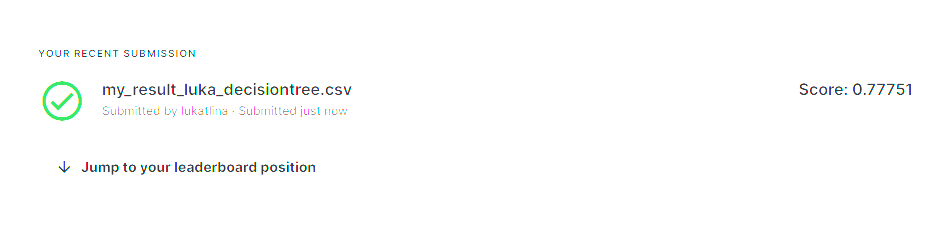

## Random Forest

In [ ]:
params = {'n_estimators': np.arange(30, 70, 10),
          'max_depth':np.arange(2, 10),
          'min_samples_split':np.arange(10, 20, 2),
          'max_features': ['sqrt', 'log2', None]}
rf = RandomForestClassifier()
grid_rf = GridSearchCV(estimator=rf, param_grid=params, n_jobs=-1)

In [ ]:
grid_rf.fit(X_tr, y_tr)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_split': array([10, 12, 14, 16, 18]),
                         'n_estimators': array([30, 40, 50, 60])})

In [ ]:
grid_rf.best_params_

{'max_depth': 7,
 'max_features': 'log2',
 'min_samples_split': 14,
 'n_estimators': 30}

In [ ]:
grid_rf.best_score_

0.8361245370660976

In [ ]:
best_grid_rf = grid_rf.best_estimator_
best_grid_rf

RandomForestClassifier(max_depth=7, max_features='log2', min_samples_split=14,
                       n_estimators=30)

In [ ]:
te_pred_rf = best_grid_rf.predict(X_te)
te_pred_rf[:5]

array([0., 1., 0., 0., 1.])

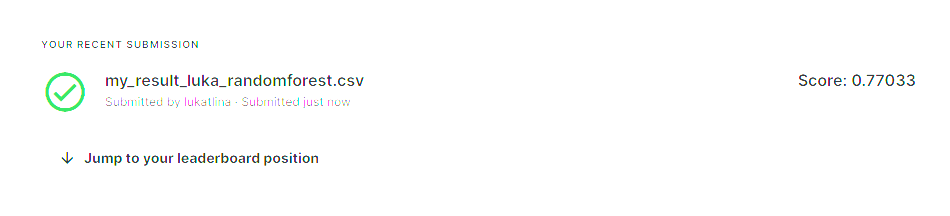

## XGBoost

In [ ]:
params = {'max_depth':np.arange(1,6),
          'learning_rate': [0.05, 0.1, 0.15],
          'n_estimator': np.arange(1, 10)}
xgb_clf = XGBClassifier()
grid_xgb = GridSearchCV(estimator=xgb_clf, param_grid=params, n_jobs=-1)

In [ ]:
grid_xgb.fit(X_tr, y_tr)

GridSearchCV(estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.15],
                         'max_depth': array([1, 2, 3, 4, 5]),
                         'n_estimator': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [ ]:
grid_xgb.best_score_

0.8327788588286987

In [ ]:
grid_xgb.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimator': 1}

In [ ]:
best_grid_xgb = grid_xgb.best_estimator_
best_grid_xgb

XGBClassifier(n_estimator=1)

In [ ]:
te_pred_xgb = best_grid_xgb.predict(X_te)
te_pred_xgb[:5]

array([0., 1., 0., 0., 1.])

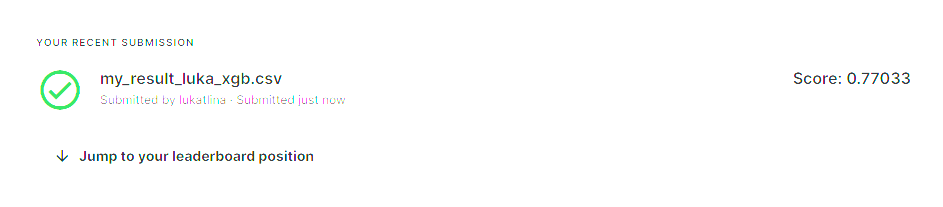

## Logistic Regression

In [ ]:
params = {'penalty':['l1', 'l2', 'elasticnet', 'none'],
          'C' : [0.1, 0.2, 0.3, 0.4, 0.5],
          'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
          'max_iter': [30, 40, 50, 60]}
logistic = LogisticRegression(n_jobs=-1)
grid_logistic = GridSearchCV(estimator=logistic, param_grid=params, n_jobs=-1)

In [ ]:
grid_logistic.fit(X_tr, y_tr)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
900 fits failed out of a total of 2000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: So

GridSearchCV(estimator=LogisticRegression(n_jobs=-1), n_jobs=-1,
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'max_iter': [30, 40, 50, 60],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [ ]:
grid_logistic.best_params_

{'C': 0.4, 'max_iter': 40, 'penalty': 'l2', 'solver': 'lbfgs'}

In [ ]:
grid_logistic.best_score_

0.8361370912058252

In [ ]:
best_grid_logistic = grid_logistic.best_estimator_
best_grid_logistic

LogisticRegression(C=0.4, max_iter=40, n_jobs=-1)

In [ ]:
te_pred_logistic = best_grid_logistic.predict(X_te)
te_pred_logistic[:5]

array([0., 1., 0., 0., 1.])

## SVC

In [ ]:
params = {'C':[2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0],
          'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
          'gamma':['scale', 'auto']}
svm = SVC()
grid_svc = GridSearchCV(estimator=svm, param_grid=params, n_jobs=-1)

In [ ]:
grid_svc.fit(X_tr, y_tr)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [ ]:
grid_svc.best_params_

{'C': 3.0, 'gamma': 'scale', 'kernel': 'rbf'}

In [ ]:
grid_svc.best_score_

0.8361182599962339

In [ ]:
best_grid_svc = grid_svc.best_estimator_
best_grid_svc

SVC(C=3.0)

In [ ]:
te_pred_svc = best_grid_svc.predict(X_te)
te_pred_svc[:5]

array([0., 1., 0., 0., 1.])

## Hard Voting

In [ ]:
hard_vot = VotingClassifier(estimators=[('knn', knn),
                                        ('dt', dt),
                                        ('rf', rf),
                                         ('gnb', gnb),
                                         ('sgd', sgd),
                                         ('svc', svc),
                                         ('lr', lr),
                                         ('xgb', xgbc)],
                            n_jobs=-1)

In [ ]:
hard_vot.fit(X_tr, y_tr)

VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('dt', DecisionTreeClassifier()),
                             ('rf', RandomForestClassifier()),
                             ('gnb', GaussianNB()),
                             ('sgd', SGDClassifier(loss='log')),
                             ('svc', SVC(probability=True)),
                             ('lr', LogisticRegression()),
                             ('xgb', XGBClassifier())],
                 n_jobs=-1)

In [ ]:
hard_vot.score(X_tr, y_tr)

0.8686868686868687

In [ ]:
te_pred_hard = hard_vot.predict(X_te)
te_pred_hard[:5]

array([0., 1., 0., 0., 1.])

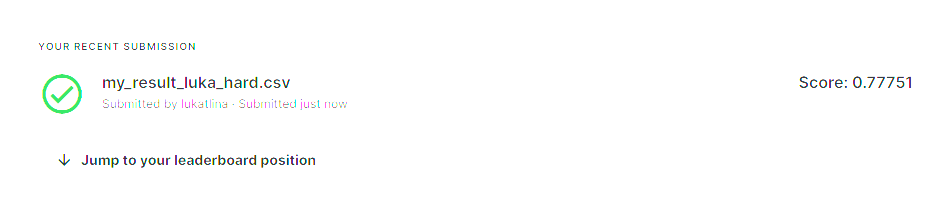

## Soft Voting

In [ ]:
soft_vot = VotingClassifier(estimators=[('knn', knn),
                                        ('dt', dt),
                                        ('rf', rf),
                                         ('gnb', gnb),
                                         ('sgd', sgd),
                                         ('svc', svc),
                                         ('lr', lr),
                                         ('xgb', xgbc)],
                            voting='soft',
                            n_jobs=-1)

In [ ]:
soft_vot.fit(X_tr, y_tr)

VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('dt', DecisionTreeClassifier()),
                             ('rf', RandomForestClassifier()),
                             ('gnb', GaussianNB()),
                             ('sgd', SGDClassifier(loss='log')),
                             ('svc', SVC(probability=True)),
                             ('lr', LogisticRegression()),
                             ('xgb', XGBClassifier())],
                 n_jobs=-1, voting='soft')

In [ ]:
soft_vot.score(X_tr, y_tr)

0.8698092031425365

In [ ]:
te_pred_soft = soft_vot.predict(X_te)
te_pred_soft[:5]

array([0., 1., 0., 0., 1.])

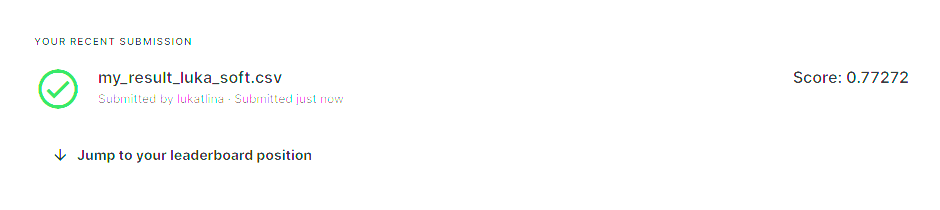

In [ ]:
my_result = pd.DataFrame({'PassengerId':idx,
                          'Survived':te_pred_svc})

In [ ]:
my_result['Survived'] = my_result['Survived'].astype(int)

In [ ]:
my_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 891 to 1308
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 9.8 KB


In [ ]:
my_result.to_csv('my_result_luka_svc.csv', index=False)